In [1]:
#Load and read in data
data_file = 'data/Absenteeism_at_work.csv'
import pandas as pd
data_csv = pd.read_csv(data_file, sep=';', decimal='.', header=0,
                               names=['id', 'reason_absent', 'month_absent', 'day_absent', 'season',
                                      'transport_expense', 'distance_work', 'service_time', 'age',
                                      'day_workload', 'hit_target', 'disciplinary_failure', 'education', 'children',
                                      'social_drinker', 'social_smoker', 'pet', 'weight', 'height', 'bmi', 'absent_time'])

#copy file
data_copy = data_csv.copy()

#check file data types to see if the data was read correctly
print("Read in data types from file:")
print(data_copy.dtypes)
print("")

#No need to check for whitespace as it is all integer data types
#No need to turn to uppercase as all the values are of type integer
#Note some attributes use integers to classify an attribute, this will be changed to the true categorical value

import numpy as np
def checkSanity(attribute, lower, upper):
    errors = []
    for value in data_copy[attribute]:
        if value < lower or value > upper:
            if value not in errors:
                errors.append(value)
    print("Errors in " + attribute + ":")
    for value in errors:
        print(value)

print("Sanity Checks:")
# 8760 = amount of hours in a year, if theyre are absent for more than a year, it is questionable if they are still employed
checkSanity('id', 1, 36)
checkSanity('reason_absent', 0, 28)
checkSanity('month_absent', 1, 12)
checkSanity('day_absent', 2, 6)
checkSanity('season', 1, 4)
# if a transport expense exceeds 500 a worker would not be working at the workplace
checkSanity('transport_expense', 0, 500)
# 100 is an incredibly large distance that a worker should not be travelling
checkSanity('distance_work', 5, 100)
# 72 is three days, a courier driver should not be working for 3 days straight
checkSanity('service_time', 0, 48)
checkSanity('age', 0, 120)
# workload should logically not exceed 500
checkSanity('day_workload', 0, 500)
# percentage of the target hit
checkSanity('hit_target', 0, 100)
checkSanity('disciplinary_failure', 0, 1)
checkSanity('education', 1, 4)
checkSanity('children', 0, 20)
checkSanity('social_drinker', 0, 1)
checkSanity('social_smoker', 0, 1)
checkSanity('pet', 0, 20)
# height and weight should not exceed logical human limits
checkSanity('weight', 0, 500)
checkSanity('height', 0, 250)
checkSanity('bmi', 0, 50)
checkSanity('absent_time', 0, 8760)
print("")

# month absent should not contain a 0 value as there is no 0 month
# first check that seasons and months line up correctly
print("Checking months in each season")
for x in range(4):
    print("Season:" + str(x+1))
    month = []
    for value in data_copy.loc[(data_copy.season == x+1), 'month_absent']:
        if value not in month:
            month.append(value)
    for value in month:
        print(value),
    print("")
print("")
        
# discovered issues where months overlapped multiple seasons
# method to impute would be incorrect as seasons column was incorrect
# use the mean month in total data and impute into 0 month instead
data_copy.loc[(data_copy.month_absent == 0), 'month_absent'] = data_copy['month_absent'].median(axis=0)

# fix seasons according to months
summer = [12, 1, 2]
autumn = [3, 4, 5]
winter = [6, 7, 8]
spring = [9, 10, 11]
for value in summer:
    data_copy.loc[(data_copy.month_absent == value), 'season'] = 1
for value in autumn:
    data_copy.loc[(data_copy.month_absent == value), 'season'] = 2
for value in winter:
    data_copy.loc[(data_copy.month_absent == value), 'season'] = 3
for value in spring:
    data_copy.loc[(data_copy.month_absent == value), 'season'] = 4
    
#check for NaN values
def nanAmount(attribute):
    nan = 0
    for value in data_copy[attribute]:
        if pd.isnull(value):
            nan += 1
    print("Amount of Nan value in " + attribute + ": " + str(nan))
    
print("NaN checks:")
nanAmount('id')
nanAmount('reason_absent')
nanAmount('month_absent')
nanAmount('day_absent')
nanAmount('season')
nanAmount('transport_expense')
nanAmount('distance_work')
nanAmount('service_time')
nanAmount('age')
nanAmount('day_workload')
nanAmount('hit_target')
nanAmount('disciplinary_failure')
nanAmount('education')
nanAmount('children')
nanAmount('social_drinker')
nanAmount('social_smoker')
nanAmount('pet')
nanAmount('weight')
nanAmount('height')
nanAmount('bmi')
nanAmount('absent_time')
print("")

Read in data types from file:
id                        int64
reason_absent             int64
month_absent              int64
day_absent                int64
season                    int64
transport_expense         int64
distance_work             int64
service_time              int64
age                       int64
day_workload            float64
hit_target                int64
disciplinary_failure      int64
education                 int64
children                  int64
social_drinker            int64
social_smoker             int64
pet                       int64
weight                    int64
height                    int64
bmi                       int64
absent_time               int64
dtype: object

Sanity Checks:
Errors in id:
Errors in reason_absent:
Errors in month_absent:
0
Errors in day_absent:
Errors in season:
Errors in transport_expense:
Errors in distance_work:
Errors in service_time:
Errors in age:
Errors in day_workload:
Errors in hit_target:
Errors in disciplinary_f

In [2]:
data_copy_explore = data_copy.copy()
#Need to edit the integers to represent their actual values as some values are catagorical data
def replace(attribute, old, new):
    data_copy_explore[attribute].replace(old, new, inplace=True)

# solely for readability, the following code will change the integer catagorical values to their real catagorical values in a copied data set solely for exploration
replace("season", 1, "Summer")
replace("season", 2, "Autumn")
replace("season", 3, "Winter")
replace("season", 4, "Spring")
# replacing all absent reason integers with their true value would clutter graphs hence should be looked up by the reader
replace("reason_absent", 0, "No reason")
replace("reason_absent", 1, "Infectious & Parasitic Disease")
replace("reason_absent", 2, "Neoplasms")
replace("reason_absent", 3, "Disease in blood")
replace("reason_absent", 4, "Endocrine, nutritional & metabolic disease")
replace("reason_absent", 5, "Mental & Behvioural disorder")
replace("reason_absent", 6, "Disease in nervous system")
replace("reason_absent", 7, "Diseases of the eye and adnexa")
replace("reason_absent", 8, "Diseases of the ear and mastoid process")
replace("reason_absent", 9, "Diseases of the circulatory system")
replace("reason_absent", 10, "Diseases of the respiratory system")
replace("reason_absent", 11, "Diseases of the digestive system")
replace("reason_absent", 12, "Diseases of the skin and subcutaneous tissue")
replace("reason_absent", 13, "Diseases of the musculoskeletal system and connective tissue")
replace("reason_absent", 14, "Diseases of the genitourinary system")
replace("reason_absent", 15, "Pregnancy, childbirth and the puerperium")
replace("reason_absent", 16, "Certain conditions originating in the perinatal period")
replace("reason_absent", 17, "Congenital malformations, deformations and chromosomal abnormalities")
replace("reason_absent", 18, "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified")
replace("reason_absent", 19, "Injury, poisoning and certain other consequences of external causes")
replace("reason_absent", 20, "External causes of morbidity and mortality")
replace("reason_absent", 21, "Factors influencing health status and contact with health services")
replace("reason_absent", 22, "Patient follow-up")
replace("reason_absent", 23, "Medical consultation")
replace("reason_absent", 24, "Blood donation")
replace("reason_absent", 25, "Laboratory examination")
replace("reason_absent", 26, "Unjustified absence")
replace("reason_absent", 27, "Physiotherapy")
replace("reason_absent", 28, "Dental consultation")
replace("disciplinary_failure", 1, "Yes")
replace("disciplinary_failure", 0, "No")
replace("education", 1, "High School")
replace("education", 2, "Graduate")
replace("education", 3, "Postgraduate")
replace("education", 4, "Master & Doctor")
replace("social_drinker", 1, "Yes")
replace("social_drinker", 0, "No")
replace("social_smoker", 1, "Yes")
replace("social_smoker", 0, "No")

import matplotlib.pyplot as plt

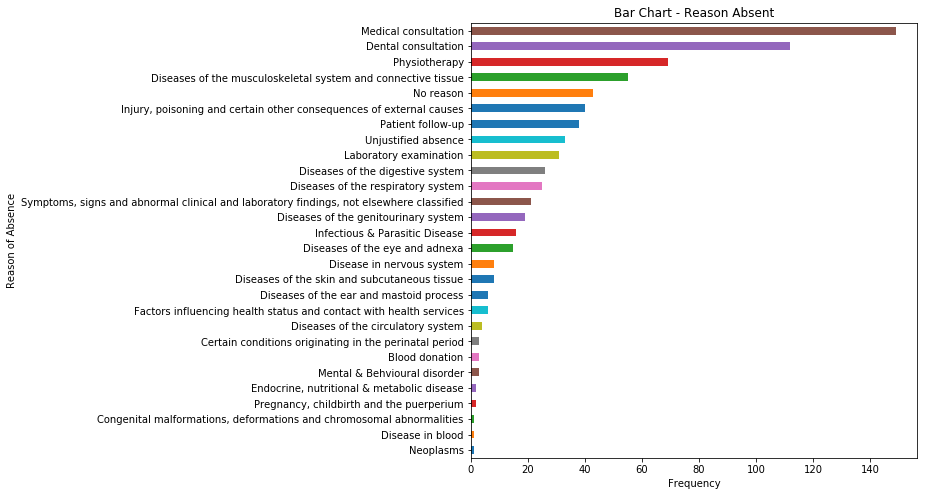

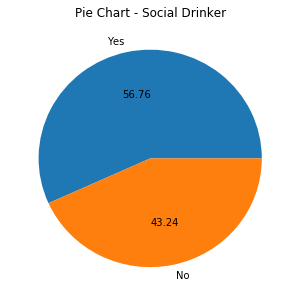

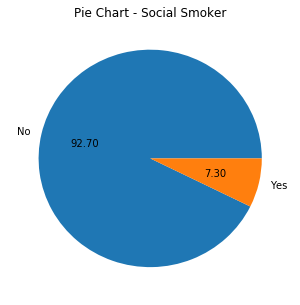

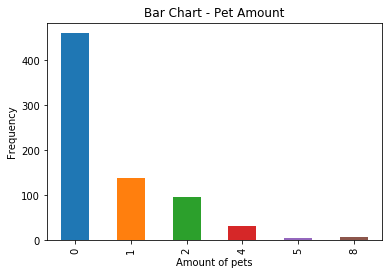

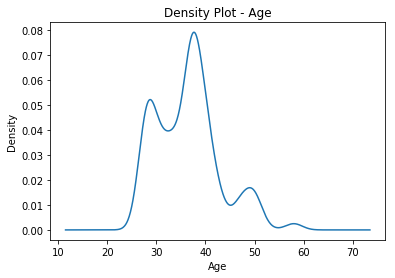

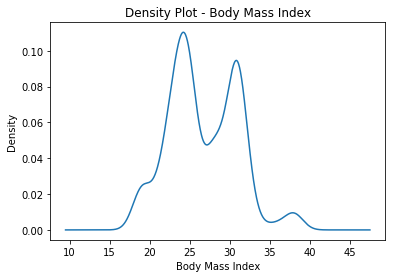

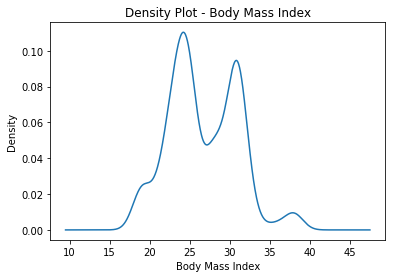

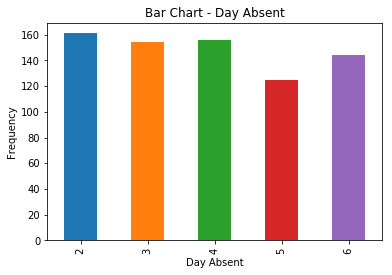

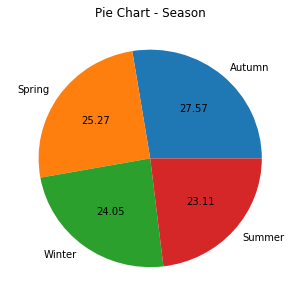

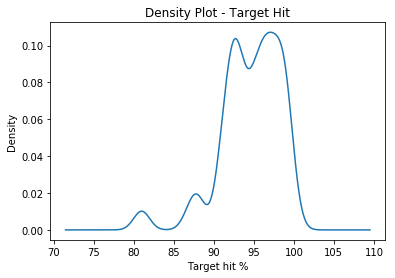

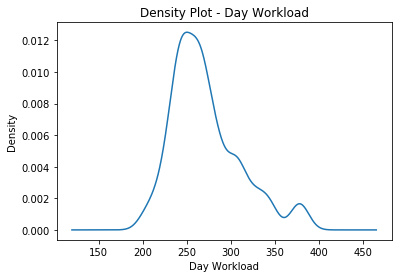

In [3]:
#Create density plot for numerical value of age
plt.figure(1, figsize=(8,8))
data_copy_explore['reason_absent'].value_counts().sort_values().plot(kind='barh')
plt.title("Bar Chart - Reason Absent")
plt.ylabel("Reason of Absence")
plt.xlabel("Frequency")
plt.show()

plt.figure(2)
data_copy_explore['social_drinker'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5,5))
plt.ylabel('')
plt.title('Pie Chart - Social Drinker')
plt.show()

plt.figure(3)
data_copy_explore['social_smoker'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5,5))
plt.ylabel('')
plt.title('Pie Chart - Social Smoker')

plt.figure(4)
data_copy_explore['pet'].value_counts().sort_index().plot(kind='bar')
plt.title("Bar Chart - Pet Amount")
plt.ylabel("Frequency")
plt.xlabel("Amount of pets")
plt.show()

plt.figure(5)
data_copy_explore['age'].plot(kind='density')
plt.title("Density Plot - Age")
plt.xlabel("Age")
plt.show()

plt.figure(6)
data_copy_explore['bmi'].plot(kind='density')
plt.title("Density Plot - Body Mass Index")
plt.xlabel("Body Mass Index")
plt.show()

plt.figure(6)
data_copy_explore['bmi'].plot(kind='density')
plt.title("Density Plot - Body Mass Index")
plt.xlabel("Body Mass Index")
plt.show()

plt.figure(7)
data_copy_explore['day_absent'].value_counts().sort_index().plot(kind='bar')
plt.title("Bar Chart - Day Absent")
plt.ylabel("Frequency")
plt.xlabel("Day Absent")
plt.show()

plt.figure(8)
data_copy_explore['season'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5,5))
plt.ylabel('')
plt.title('Pie Chart - Season')
plt.show()

plt.figure(9)
data_copy_explore['hit_target'].plot(kind='density')
plt.title("Density Plot - Target Hit")
plt.xlabel("Target hit %")
plt.show()

plt.figure(10)
data_copy_explore['day_workload'].plot(kind='density')
plt.title("Density Plot - Day Workload")
plt.xlabel("Day Workload")
plt.show()

<Figure size 432x288 with 0 Axes>

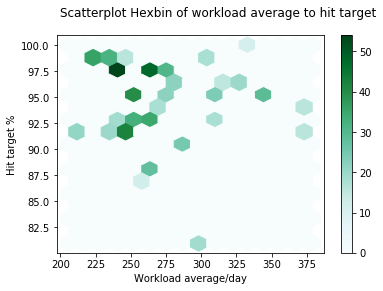

<Figure size 432x288 with 0 Axes>

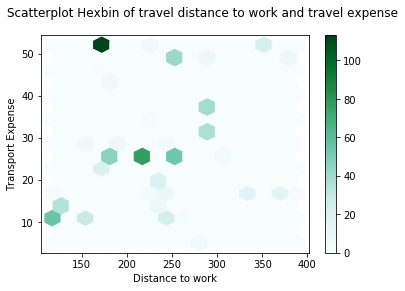

<Figure size 432x288 with 0 Axes>

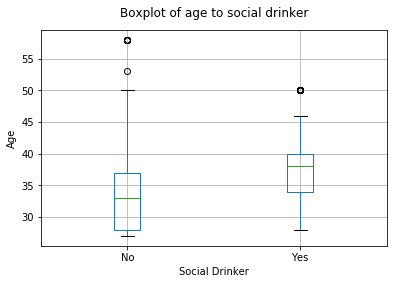

<Figure size 432x288 with 0 Axes>

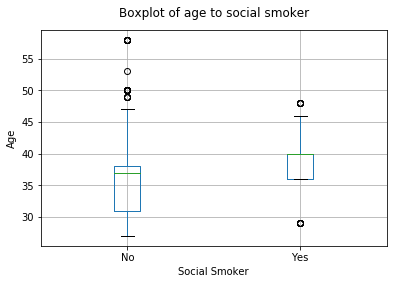

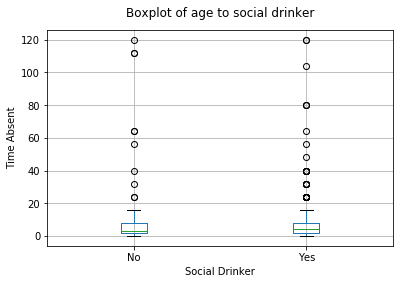

<Figure size 432x288 with 0 Axes>

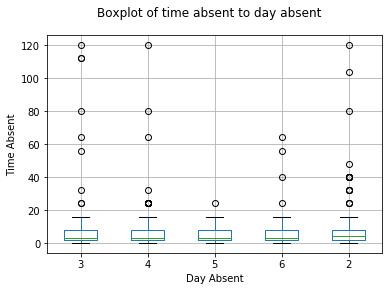

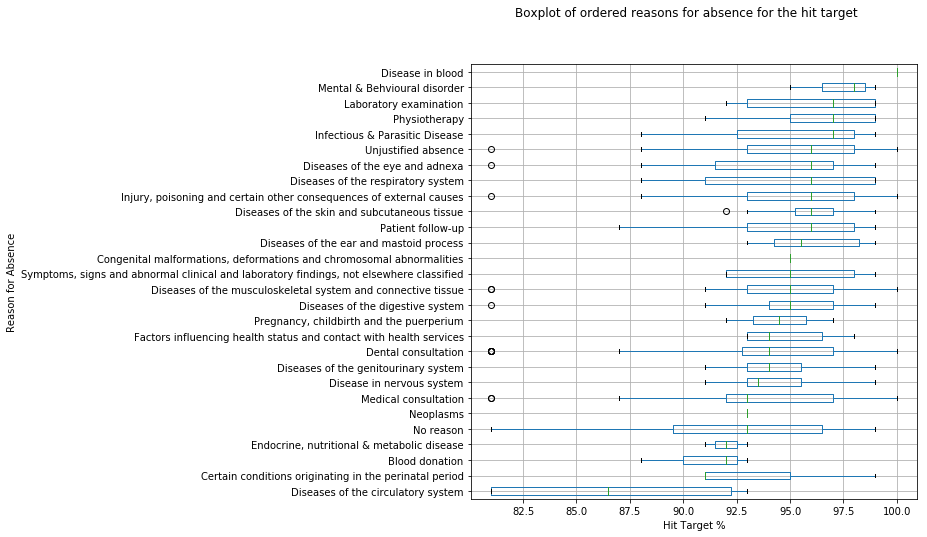

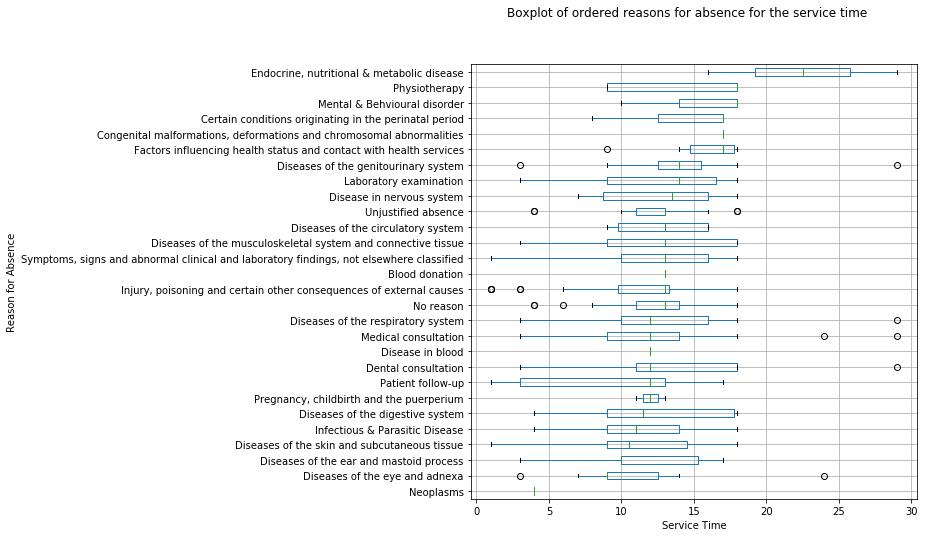

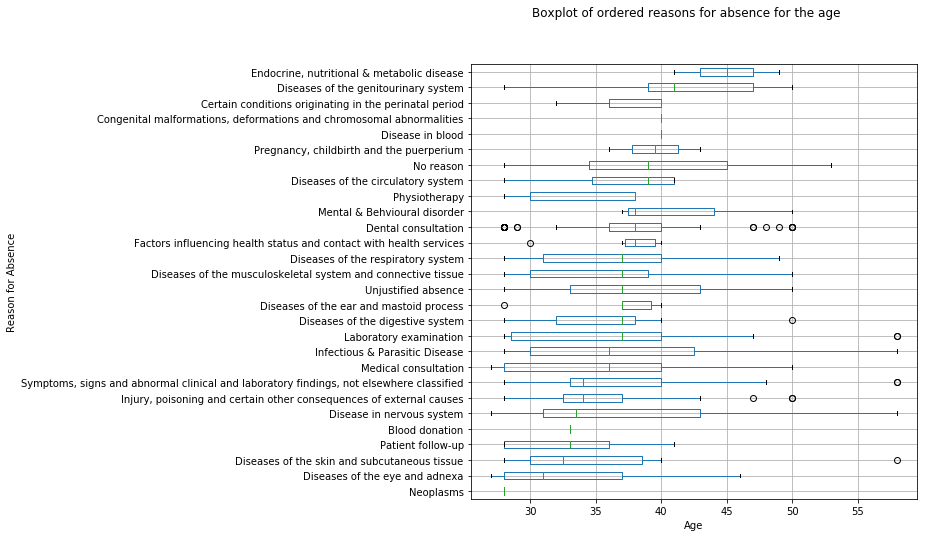

<Figure size 432x288 with 0 Axes>

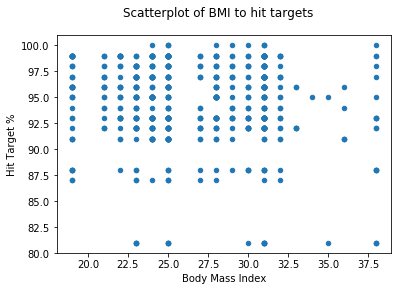

In [4]:
#Create and show second visualisation
plt.figure(11)
data_copy_explore.plot(kind='hexbin', x=9,y=10,gridsize=15, sharex=False)
plt.suptitle("Scatterplot Hexbin of workload average to hit target")
plt.title("")
plt.ylabel("Hit target %")
plt.xlabel("Workload average/day")
plt.show()

plt.figure(12)
data_copy_explore.plot(kind='hexbin', x=5,y=6,gridsize=15, sharex=False)
plt.suptitle("Scatterplot Hexbin of travel distance to work and travel expense")
plt.title("")
plt.ylabel("Transport Expense")
plt.xlabel("Distance to work")
plt.show()

plt.figure(13)
data_copy_explore.dropna().boxplot(column='age',by='social_drinker')
plt.suptitle("Boxplot of age to social drinker")
plt.title("")
plt.ylabel("Age")
plt.xlabel("Social Drinker")
plt.show()

plt.figure(14)
data_copy_explore.dropna().boxplot(column='age',by='social_smoker')
plt.suptitle("Boxplot of age to social smoker")
plt.title("")
plt.ylabel("Age")
plt.xlabel("Social Smoker")
plt.show()

plt.figure(15)
data_copy_explore.dropna().boxplot(column='absent_time',by='social_drinker')
plt.suptitle("Boxplot of age to social drinker")
plt.title("")
plt.ylabel("Time Absent")
plt.xlabel("Social Drinker")
plt.show()

plt.figure(16)
#Create and show first visualisation
#Duncan Parkes. (2016). Sort Pandas Boxplots. Available: https://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/. Last accessed 06/04/2019.
tempDataFrame = pd.DataFrame({col:vals['absent_time'] for col, vals in data_copy_explore.groupby(by=['day_absent'])})
sortedMedian = tempDataFrame.median().sort_values()
tempDataFrame[sortedMedian.index].boxplot()
plt.suptitle("Boxplot of time absent to day absent")
plt.title("")
plt.ylabel("Time Absent")
plt.xlabel("Day Absent")
plt.show()

plt.figure(17, figsize=(8,8))
#Create and show first visualisation
#Duncan Parkes. (2016). Sort Pandas Boxplots. Available: https://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/. Last accessed 06/04/2019.
tempDataFrame = pd.DataFrame({col:vals['hit_target'] for col, vals in data_copy_explore.groupby(by=['reason_absent'])})
sortedMedian = tempDataFrame.median().sort_values()
tempDataFrame[sortedMedian.index].boxplot(vert=False)
plt.suptitle("Boxplot of ordered reasons for absence for the hit target")
plt.title("")
plt.ylabel("Reason for Absence")
plt.xlabel("Hit Target %")
plt.show()

plt.figure(18, figsize=(8,8))
#Create and show first visualisation
#Duncan Parkes. (2016). Sort Pandas Boxplots. Available: https://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/. Last accessed 06/04/2019.
tempDataFrame = pd.DataFrame({col:vals['service_time'] for col, vals in data_copy_explore.groupby(by=['reason_absent'])})
sortedMedian = tempDataFrame.median().sort_values()
tempDataFrame[sortedMedian.index].boxplot(vert=False)
plt.suptitle("Boxplot of ordered reasons for absence for the service time")
plt.title("")
plt.ylabel("Reason for Absence")
plt.xlabel("Service Time")
plt.show()

plt.figure(19, figsize=(8,8))
#Create and show first visualisation
#Duncan Parkes. (2016). Sort Pandas Boxplots. Available: https://deparkes.co.uk/2016/11/04/sort-pandas-boxplot/. Last accessed 06/04/2019.
tempDataFrame = pd.DataFrame({col:vals['age'] for col, vals in data_copy_explore.groupby(by=['reason_absent'])})
sortedMedian = tempDataFrame.median().sort_values()
tempDataFrame[sortedMedian.index].boxplot(vert=False)
plt.suptitle("Boxplot of ordered reasons for absence for the age")
plt.title("")
plt.ylabel("Reason for Absence")
plt.xlabel("Age")
plt.show()

plt.figure(20)
data_copy_explore.plot(kind='scatter', x=19,y=10)
plt.suptitle("Scatterplot of BMI to hit targets")
plt.title("")
plt.ylabel("Hit Target %")
plt.xlabel("Body Mass Index")
plt.show()

In [5]:
# remove outliers as models will be more effective, although it should not be removed before data exploration as these outliers still show valuable information
from scipy import stats
z = np.abs(stats.zscore(data_copy))
data_copy = data_copy[(z < 3).all(axis=1)]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier 

def knn(df, x, y, size):
    # split the data into test and train data
    x_split = x
    y_split = y
    X_train, X_test, y_train, y_test = train_test_split(x_split, y_split, test_size=size, random_state=4)

    # train k neighbours model
    # use sqrt of number of rows
    # select square root of total observations and high k to reduce noise
    clf = KNeighborsClassifier(27, weights='distance', p=1)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)

    # create confusion model and view performance
    cm = confusion_matrix(y_test,predicted)
    print "K Nearest Neighbour - test size:", size
    print ("Confusion Matrix:")
    print (cm)
    # identify the error rate
    print "Classification Error Rate:",((1-(clf.score(X_test, y_test)))*100),"%"
    # print the precision recall and f1-score
    print classification_report(y_test,predicted)
    print("")

# initial test to see the overall accuracy of the model
x = data_copy[['id', 'month_absent', 'day_absent', 'season', 'transport_expense', 'distance_work', 'service_time', 'age', 'day_workload', 'hit_target', 'disciplinary_failure', 'education', 'children', 'social_drinker', 'social_smoker', 'pet', 'weight', 'height', 'bmi', 'absent_time']]
y = data_copy['reason_absent']
print("Pre feature engineering score:")
knn(data_copy, x, y, 0.5)

# due to the innaccuracy of the data, some feature engineering will be performed to increase accuracy slightly
# create interaction feature
data_copy_model = data_copy.copy()
data_copy_model["workload_hit"] = data_copy_model["day_workload"]*((data_copy_model["hit_target"]-100)/100)
data_copy_model["cost_per_km"] = data_copy_model["transport_expense"]/data_copy_model["distance_work"]
data_copy_model["cid"] = np.where(data_copy_model["reason_absent"]<22, 0, 1)

# the x and y values to split
x = data_copy_model[['id', 'cid', 'month_absent', 'day_absent', 'season', 'cost_per_km', 'service_time', 'age', 'workload_hit', 'disciplinary_failure', 'education', 'children', 'social_drinker', 'social_smoker', 'pet', 'bmi', 'absent_time']]
y = data_copy_model['reason_absent']
print("K Nearest Neighbour Task:")
# test model for different splits of test and training data sizes
knn(data_copy_model, x, y, 0.5)
knn(data_copy_model, x, y, 0.4)
knn(data_copy_model, x, y, 0.2)

Pre feature engineering score:
K Nearest Neighbour - test size: 0.5
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  0  0  2  0  0  0  0  0  0  0  1  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1  0  0  0  2  3]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  2  0  2  8  0  0  1  8  3]
 [ 0  0  0  0 

In [7]:
# Decision tree model
def dtc(df, x, y, size):
    # split the data into test and train data
    x_split = x
    y_split = y
    X_train, X_test, y_train, y_test = train_test_split(x_split, y_split, test_size=size, random_state=4)
    
    #train model then test
    clf = DecisionTreeClassifier(random_state=5)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pre)
    print "Decision Tree Classifier - test size:", size
    print ("Confusion Matrix:")
    print (cm)
    # identify the error rate
    print "Classification Error Rate:",((1-(clf.score(X_test, y_test)))*100),"%"
    # print the precision recall and f1-score
    print classification_report(y_test,y_pre)
    print("")

# the x and y values to split
x = data_copy_model[['id', 'cid', 'month_absent', 'day_absent', 'season', 'cost_per_km', 'service_time', 'age', 'workload_hit', 'disciplinary_failure', 'education', 'children', 'social_drinker', 'social_smoker', 'pet', 'bmi', 'absent_time']]
y = data_copy_model['reason_absent']
print("Decision Tree Classifier Tasks:")
# test model for different splits of test and training data sizes
dtc(data_copy_model, x, y, 0.5)
dtc(data_copy_model, x, y, 0.4)
dtc(data_copy_model, x, y, 0.2)

Decision Tree Classifier Tasks:
Decision Tree Classifier - test size: 0.5
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  2  2  0  1  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  1  1  0  1  1  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1  2  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  0  2  6  1  9  1  0  0  4  2  0  0  0  0  0  0  0]
 [ 0  0 